In [9]:
pip install matplotlib pandas numpy seaborn scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.5/32.5 MB 60.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


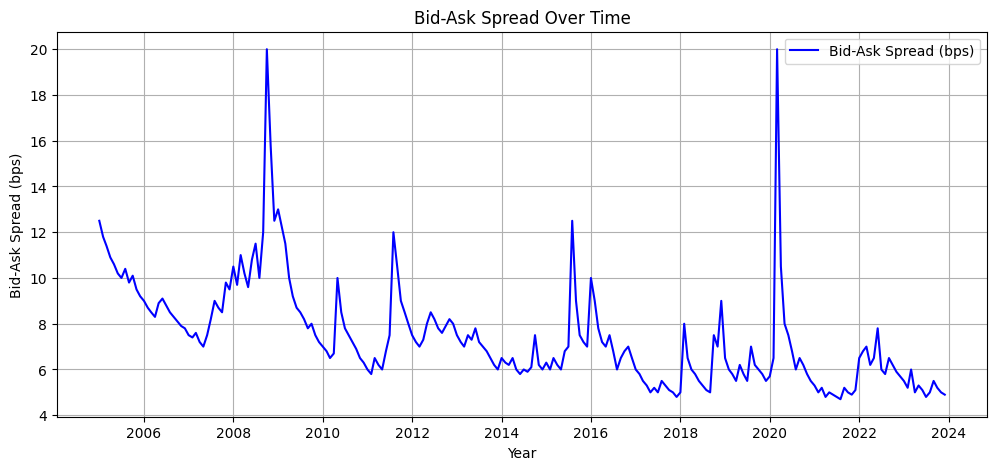

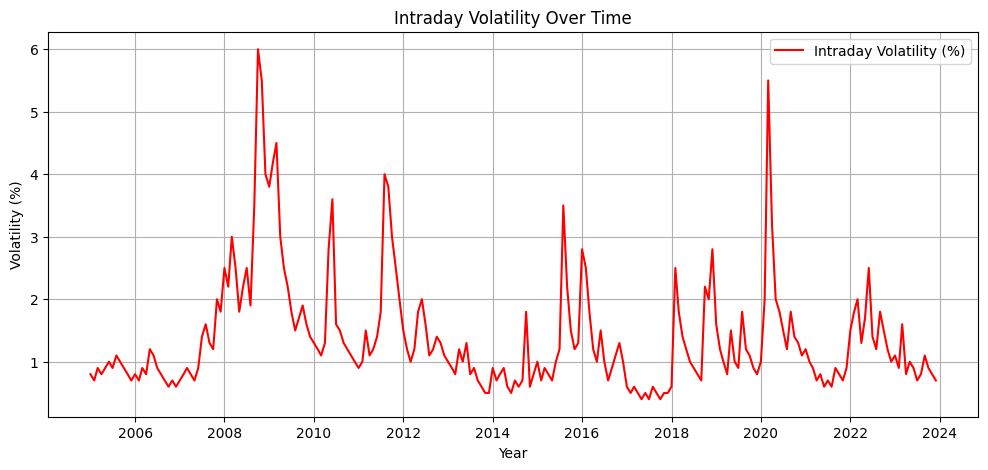

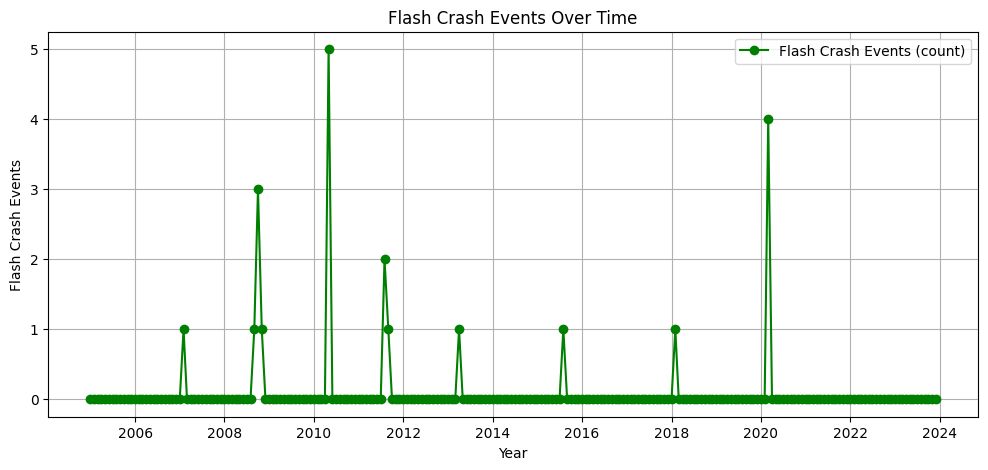

Summary Statistics:
       bid_ask_spread  intraday_volatility
count      228.000000           228.000000
mean         7.437281             1.385088
std          2.274444             0.920853
min          4.700000             0.400000
25%          6.000000             0.800000
50%          7.000000             1.100000
75%          8.350000             1.600000
max         20.000000             6.000000

Correlation Coefficient: 0.7596 (p-value: 4.1811e-44)

Linear Regression Equation: y = 0.3075 * x + -0.9021
R-squared Value: 0.5770


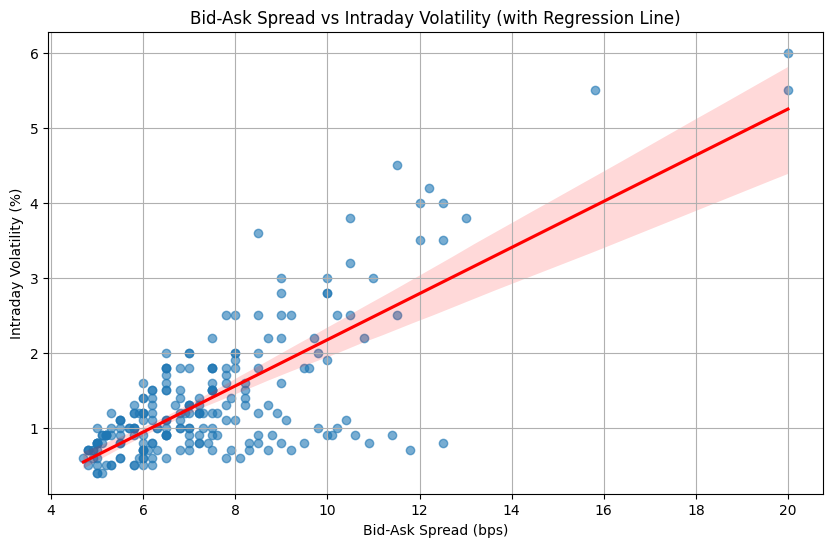

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import linregress, pearsonr

# Load data from CSV
file_path = "market_data.csv"
df = pd.read_csv(file_path, parse_dates=["date"])

# Plot Bid-Ask Spread Over Time
plt.figure(figsize=(12, 5))
plt.plot(df["date"], df["bid_ask_spread"], label="Bid-Ask Spread (bps)", color="blue")
plt.xlabel("Year")
plt.ylabel("Bid-Ask Spread (bps)")
plt.title("Bid-Ask Spread Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot Intraday Volatility Over Time
plt.figure(figsize=(12, 5))
plt.plot(
    df["date"],
    df["intraday_volatility"],
    label="Intraday Volatility (%)",
    color="red",
)
plt.xlabel("Year")
plt.ylabel("Volatility (%)")
plt.title("Intraday Volatility Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot Flash Crash Events Over Time
plt.figure(figsize=(12, 5))
plt.plot(
    df["date"],
    df["flash_crash_events_count"],
    label="Flash Crash Events (count)",
    color="green",
    marker="o",
    linestyle="-",
)
plt.xlabel("Year")
plt.ylabel("Flash Crash Events")
plt.title("Flash Crash Events Over Time")
plt.legend()
plt.grid(True)
plt.show()


# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Print statistics
print("Summary Statistics:")
print(df[["bid_ask_spread", "intraday_volatility"]].describe())

# Print correlation coefficient
corr_coef, p_value = pearsonr(df["bid_ask_spread"], df["intraday_volatility"])
print(f"\nCorrelation Coefficient: {corr_coef:.4f} (p-value: {p_value:.4e})")

# Create and print linear regression
slope, intercept, r_value, p_val, std_err = linregress(
    df["bid_ask_spread"], df["intraday_volatility"]
)
print(f"\nLinear Regression Equation: y = {slope:.4f} * x + {intercept:.4f}")
print(f"R-squared Value: {r_value**2:.4f}")

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x=df["bid_ask_spread"],
    y=df["intraday_volatility"],
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},
)
plt.xlabel("Bid-Ask Spread (bps)")
plt.ylabel("Intraday Volatility (%)")
plt.title("Bid-Ask Spread vs Intraday Volatility (with Regression Line)")
plt.grid(True)
plt.show()
